<a href="https://colab.research.google.com/github/Svetorus/Python-Data-Science/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

from sklearn.linear_model import LinearRegression
from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2,mean_squared_error as mse,mean_absolute_error as mae
import textwrap

import warnings
warnings.filterwarnings('ignore')

### Функции  
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Ссылки-на-задачи" data-toc-modified-id="Ссылки-на-задачи-0.0.1">Ссылки на задачи</a></span></li></ul></div>

In [0]:
def data(df):
    plt.figure(figsize = (16,16))

    for i, colname in enumerate(df.columns):
        counts = df[colname].value_counts()

        plt.subplot(3,2,i+1)    
        plt.title(colname)
        sns.barplot(counts.index, counts.values)

    plt.show()

In [0]:
def graphic_gender(men,women):
    plt.figure(figsize = (12, 6))

    plt.subplot(121)
    men['Возраст'].hist(grid=False)
    plt.ylabel('Кол-во больничных',color='g')
    plt.xlabel('Возраст мужчин',color='b')

    plt.subplot(122)
    women['Возраст'].hist(grid=False, color='pink')
    plt.ylabel('Кол-во больничных',color='g')
    plt.xlabel('Возраст женщин',color='r')

    plt.suptitle('Кол-во больничных по возрасту', color='b')
    plt.show()

In [0]:
def graphic_man_and_woman(men,women):
    plt.figure(figsize = (12, 6))

    plt.hist(men['Возраст'],bins=20,density=True,alpha=0.8)
    plt.hist(women['Возраст'],bins=20,density=True,alpha=0.8,color='pink')
    
    plt.suptitle('Гендерное распределение больничных', color='b')
    plt.xlabel('Возраст', color='b')
    plt.legend(['Mужчины','Женщины']);

In [0]:
def gender_count(df_1,df_2,mean_df):
    if mean_df[0]>mean_df[1]:
        diffirent = 1 - (mean_df[1]/mean_df[0])
        woman_procent = 100 - (round(diffirent,2)*100)
        man_full = round(df_1[0] + diffirent * df_1[0],6)
        man_procent = 100
        woman_full = df_2[0]
        print(f'Мужчин больше на {int(100-woman_procent)}%')
    else:
        diffirent = 1 - (mean_df[0]/mean_df[1])
        man_procent = 100 - (round(diffirent,2)*100)
        woman_full = round(df_2[0] + diffirent * df_2[0],6)
        woman_procent = 100
        man_full = df_1[0]
        print(f'Женщин больше на {int(100-man_procent)}%')
    gender = pd.DataFrame({"Пол":['Мужчины', 'Женщины'],
                    "Кол-во":[mean_gender[0], mean_gender[1]],
                    "Данная_выборка в %":[man_procent, woman_procent],
                    "Данная_выборка_mean":[man[0], woman[0]],
                    "Равнозначная_выборка в %":[100, 100],
                    "Равнозначная_выборка_mean":[man_full, woman_full]})
    return gender

In [0]:
def age(df):
    plt.figure(figsize = (14,8))
    counts = df.Возраст.value_counts()   
    plt.title('Возраст',color='g')
    sns.barplot(counts.index, counts.values);

In [0]:
def graphic_age(df1,df2):
    plt.figure(figsize = (12, 6))

    plt.subplot(121)
    df1['Возраст'].hist(grid=False, color='g')
    plt.ylabel('Кол-во больничных',color='g')
    plt.xlabel('Возраст до 35 лет',color='b')

    plt.subplot(122)
    df2['Возраст'].hist(grid=False)
    plt.ylabel('Кол-во больничных',color='g')
    plt.xlabel('Возраст после 35 лет',color='b')

    plt.suptitle('Кол-во больничных по возрасту', color='b')
    plt.show()

In [0]:
def corr_matrix(df, cmap='Greys'):
    plt.figure(figsize=(24,18))

    corr = df.corr()
    mask = np.triu(corr, k=1)
    rcParams['figure.figsize'] = 22, 12
    sns.heatmap(corr, mask=mask, linewidths=.2, linecolor='lightgrey', cmap=cmap, annot=True)
    plt.xticks(rotation=50, horizontalalignment='right')
    plt.autoscale()

    return plt.show()

In [0]:
def main_features(df):
    cat_features = [i for i, (col, ser) in enumerate(df.iteritems()) if ser.dtype == object]
    pool = Pool(data=df.iloc[:, :-1], label=df.iloc[:, -1], cat_features=cat_features)

    model = CatBoostRegressor(iterations=100, 
                              depth=2,silent=True, 
                              loss_function='RMSE')

    model.fit(pool)

    preds = model.get_feature_importance(data=pool, type='Interaction')
    
    data_new_fichy = pd.DataFrame({'first_feature':[i[0] for i in preds],
                  'second_feature':[i[1] for i in preds],
                  'impact on Y in %':[i[2] for i in preds]})
    number_fich = dict(enumerate(df.iloc[0:0,1:].columns, start=1))
    for i in data_new_fichy['first_feature']:
        if i in number_fich:
            data_new_fichy.loc[data_new_fichy['first_feature']==i,'first_feature']=number_fich[i]
    for i in data_new_fichy['second_feature']:
        if i in number_fich:
            data_new_fichy.loc[data_new_fichy['second_feature']==i,'second_feature']=number_fich[i]      
    data_new_fichy['impact on Y in %'] = round(data_new_fichy['impact on Y in %'],2)
    return data_new_fichy

In [0]:
def scatter_matrix(df):
    axs = pd.plotting.scatter_matrix(df, figsize=[20,20])

    def wrap(txt, width=8):
        '''helper function to wrap text for long labels'''
        return '\n'.join(textwrap.wrap(txt, width))

    for ax in axs[:,0]: # the left boundary
        ax.grid('off', axis='both')
        ax.set_ylabel(wrap(ax.get_ylabel()), rotation=0, va='center', ha='right', labelpad=20)
        ax.set_yticks([])

    for ax in axs[-1,:]: # the lower boundary
        ax.grid('off', axis='both')
        ax.set_xlabel(wrap(ax.get_xlabel()), rotation=90)
        ax.set_xticks([])

    return plt.show()

In [0]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Тренировочные значения')
    plt.title('Тренировочная выборка')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Тренировочные значения')
    plt.title('Валидационная выборка')

    plt.show()

In [0]:
def train_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    print("R2: {}".format(r2((y_valid), (y_pred))))
    print("MSE: {}".format(mse((y_valid), (y_pred))))
    print("MAE: {}".format(mae((y_valid), (y_pred))))
    print("RMSE: {}".format(np.sqrt(mse((y_valid), (y_pred)))))

In [0]:
def corr_target(df):

    corr_with_target = df.corr().iloc[:-1, -1].sort_values(ascending=False)

    plt.figure(figsize=(10, 8))

    sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

    plt.title('Correlation with target variable')
    plt.show()

<h1>Ссылки на задачи<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Функции" data-toc-modified-id="Функции-0.0.1">Функции</a></span></li><li><span><a href="#Задача-2" data-toc-modified-id="Задача-2-0.0.2">Задача 2</a></span></li><li><span><a href="#Задача-3" data-toc-modified-id="Задача-3-0.0.3">Задача 3</a></span></li><li><span><a href="#Задача-4" data-toc-modified-id="#Задача4-0.0.4">Задача 4</a></span></li><li><span><a href="#Обучение-и-валидация" data-toc-modified-id="Обучение-и-валидация-0.0.5">Обучение и валидация</a></span></li></ul></li></ul></li></ul></div>

# Задача 1  
#### Дополните желтые столбцы таблицы 1 (Протравлено на НТА 3) информацией из таблицы Прокатка ЛПЦ-2. Попробуйте использовать для этого различные формулы в разных столбцах.

Таблица  Прокатка ЛПЦ-2.

In [0]:
task = pd.read_excel(open('Задачи.xlsx', 'rb'),sheet_name=2,header=1)

In [0]:
task.head(2)

,Партия ЛПЦ-2,Партия,Siemens,Рулон,Дата прокатки,Плавка,МОЗ,Марка,Технология,Группа поверх.,"Размеры, мм .толщ.","Размеры, мм .шир.","Вес, т"
0,23535.1,23535,82499001,13501.0,2018-05-22,183552,0,S420MH,МК 938-32-16,NaN,6.0,1106.0,23.12
1,23533.1,23533,82498901,13301.0,2018-05-22,183552,0,S420MH,МК 938-32-16,NaN,6.0,1106.0,23.03


Открываем таблицу задания 1.

In [0]:
task_1 = pd.read_excel(open('Задачи.xlsx', 'rb'),sheet_name=0,header=1)

In [0]:
task_1.head(2)

,Дата травления,№ рулона НТА-3,Партия ЛПЦ-2,Марка,"Размеры, мм .толщ.","Размеры, мм .шир.","Вес, т"
0,14.05.2018,382834 - 15471.1,15471.1,NaN,NaN,NaN,NaN
1,14.05.2018,382849 - 15545.1,15545.1,NaN,NaN,NaN,NaN


Оставляем заполненнные колонки задания 1.

In [0]:
task_1 = task_1[['Дата травления', '№ рулона НТА-3', 'Партия ЛПЦ-2']]

In [0]:
task_1.head(2)

,Дата травления,№ рулона НТА-3,Партия ЛПЦ-2
0,14.05.2018,382834 - 15471.1,15471.1
1,14.05.2018,382849 - 15545.1,15545.1


Оставляем нужные колонки(которые необходимо найти в задании 1) из таблицы Прокатка ЛПЦ-2.

In [0]:
procatka = task[['Партия ЛПЦ-2', 'Марка', 'Размеры, мм .толщ.', 'Размеры, мм .шир.', 'Вес, т']]

In [0]:
procatka.head(2)

,Партия ЛПЦ-2,Марка,"Размеры, мм .толщ.","Размеры, мм .шир.","Вес, т"
0,23535.1,S420MH,6.0,1106.0,23.12
1,23533.1,S420MH,6.0,1106.0,23.03


### Обзор данных

Смотрим пропущенные значения в таблице Прокатка ЛПЦ-2 (в процентах).

In [0]:
round((len(procatka) - procatka.count()) / len(procatka) * 100, 2).sort_values(ascending=False)

Вес, т                1.45
Марка                 1.45
Размеры, мм .шир.     0.94
Размеры, мм .толщ.    0.94
Партия ЛПЦ-2          0.00
dtype: float64

Проверяем уникальные значения по каждому из признаков.

In [0]:
procatka.nunique().sort_values()

Размеры, мм .толщ.      102
Марка                   113
Размеры, мм .шир.       427
Вес, т                 2144
Партия ЛПЦ-2          22966
dtype: int64

In [0]:
procatka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22966 entries, 0 to 22965
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Партия ЛПЦ-2        22966 non-null  object 
 1   Марка               22633 non-null  object 
 2   Размеры, мм .толщ.  22749 non-null  float64
 3   Размеры, мм .шир.   22749 non-null  float64
 4   Вес, т              22633 non-null  float64
dtypes: float64(3), object(2)
memory usage: 897.2+ KB


Смотрим пропущенные значения в таблице задания 1.

In [0]:
round((len(task_1) - task_1.count()) / len(task_1) * 100, 2).sort_values(ascending=False)

Партия ЛПЦ-2      0.0
№ рулона НТА-3    0.0
Дата травления    0.0
dtype: float64

In [0]:
task_1.nunique().sort_values()

Дата травления      8
Партия ЛПЦ-2      860
№ рулона НТА-3    875
dtype: int64

In [0]:
task_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Дата травления  875 non-null    object 
 1   № рулона НТА-3  875 non-null    object 
 2   Партия ЛПЦ-2    875 non-null    float64
dtypes: float64(1), object(2)
memory usage: 20.6+ KB


### Устранение пропусков.
В таблице Прокатка ЛПЦ-2.

In [0]:
procatka.isnull().sum()

Партия ЛПЦ-2            0
Марка                 333
Размеры, мм .толщ.    217
Размеры, мм .шир.     217
Вес, т                333
dtype: int64

Находим сколько номеров в колонке "Партия ЛПЦ-2" начинается с буквы H (русская).

In [0]:
#procatka[procatka['Партия ЛПЦ-2'].str.match(r'[А-Я]')].shape

In [0]:
procatka[procatka['Партия ЛПЦ-2'].str.match('(Н.*)')].shape

(217, 5)

Все строчки с буквой Н имеют пробелы или значния NaN.

In [0]:
procatka[procatka["Вес, т"].isnull()].head(3)

,Партия ЛПЦ-2,Марка,"Размеры, мм .толщ.","Размеры, мм .шир.","Вес, т"
369,Н1669292205.0,NaN,NaN,NaN,NaN
370,Н1669292105.0,NaN,NaN,NaN,NaN
372,Н1669290705.0,NaN,NaN,NaN,NaN


Убираем строчки с пропущенными значениями в таблице Прокатка ЛПЦ-2.

In [0]:
procatka = procatka[~((procatka["Вес, т"].isna()))]

### Меняем тип данных  
В таблице Прокатка ЛПЦ-2, колонка 'Партия ЛПЦ-2' имеет тип данных "object". Переводим колонку в тип "float64".

In [0]:
procatka = procatka.astype({'Партия ЛПЦ-2':'float64'})

### Убираем дубликаты  
Ищем дубликаты в таблице задания 1.

In [0]:
task_1[task_1['Партия ЛПЦ-2'].duplicated()].shape

(15, 3)

Выводим дубликаты,видим ошибки или опечатки в колонке "№ рулона НТА-3" в дублях присутствует округление до сотых.

In [0]:
task_1[task_1['Партия ЛПЦ-2'].duplicated()].head(3)

,Дата травления,№ рулона НТА-3,Партия ЛПЦ-2
34,14.05.2018,283394 - 18547.10,18547.1
59,14.05.2018,383149 - 19073.10,19073.1
88,14.05.2018,183315 - 19873.10,19873.1


Убираем дубликаты в таблице задания 1.

In [0]:
task_1 = task_1[~((task_1['Партия ЛПЦ-2'].duplicated()))]

Ищем дубликаты в таблице Прокатка ЛПЦ-2

In [0]:
procatka[procatka['Партия ЛПЦ-2'].duplicated()].shape

(427, 5)

In [0]:
procatka[procatka['Партия ЛПЦ-2'].duplicated()].head(3)

,Партия ЛПЦ-2,Марка,"Размеры, мм .толщ.","Размеры, мм .шир.","Вес, т"
19,23527.1,SAE 1015,2.1,1189.0,24.97
35,23525.1,CHES 30,2.0,1273.0,25.72
49,23524.1,08пс,1.9,1276.0,25.80


Убираем дубликаты в таблице Прокатка ЛПЦ-2.

In [0]:
procatka = procatka[~((procatka['Партия ЛПЦ-2'].duplicated()))]

#### Соединяем таблицы по колонке 'Партия ЛПЦ-2'

In [0]:
df_1 = pd.merge(task_1,procatka, on=['Партия ЛПЦ-2'], how='left')

In [0]:
df_1.head(3)

,Дата травления,№ рулона НТА-3,Партия ЛПЦ-2,Марка,"Размеры, мм .толщ.","Размеры, мм .шир.","Вес, т"
0,14.05.2018,382834 - 15471.1,15471.1,08Ю,2.3,1173.0,24.97
1,14.05.2018,382849 - 15545.1,15545.1,DX51D,2.3,1388.0,27.13
2,14.05.2018,À382781 - 15694.1,15694.1,DX51D,2.0,936.0,20.11


In [0]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 859
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Дата травления      860 non-null    object 
 1   № рулона НТА-3      860 non-null    object 
 2   Партия ЛПЦ-2        860 non-null    float64
 3   Марка               860 non-null    object 
 4   Размеры, мм .толщ.  860 non-null    float64
 5   Размеры, мм .шир.   860 non-null    float64
 6   Вес, т              860 non-null    float64
dtypes: float64(4), object(3)
memory usage: 53.8+ KB


Мы создаем новый файл Excel с именем <font color='green'>"Ответы к задачам"</font>.  
Решение записываем в этот файл на первый лист с именем <font color='green'>'Лист_1'</font>.

In [0]:
#df_1.to_excel("Ответы к задачам.xlsx",sheet_name='Лист_1')

# Задача 2  
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Ссылки-на-задачи" data-toc-modified-id="Ссылки-на-задачи-0.0.1">Ссылки на задачи</a></span></li></ul></div>

#### Напишите макрос, который при указании веса в ячейке B1  находит все рулоны из таблицы Прокатка ЛПЦ-2, где вес больше указанного, и заполняет нужные поля Таблицы 3.

Обзор таблицы Прокатка ЛПЦ-2.

In [0]:
task.head(3)

,Партия ЛПЦ-2,Партия,Siemens,Рулон,Дата прокатки,Плавка,МОЗ,Марка,Технология,Группа поверх.,"Размеры, мм .толщ.","Размеры, мм .шир.","Вес, т"
0,23535.1,23535,82499001,13501.0,2018-05-22,183552,0,S420MH,МК 938-32-16,NaN,6.0,1106.0,23.12
1,23533.1,23533,82498901,13301.0,2018-05-22,183552,0,S420MH,МК 938-32-16,NaN,6.0,1106.0,23.03
2,23532.1,23532,82498801,13201.0,2018-05-22,183552,0,S420MH,МК 938-32-16,NaN,6.0,1106.0,23.07


In [0]:
procent_lost = round((len(task['Вес, т']) - task['Вес, т'].count()) / len(task['Вес, т']) * 100, 2)
print(f'Кол-во пропусков по колонке "Вес, т": {procent_lost}%')

Кол-во пропусков по колонке "Вес, т": 1.45%


Убираем пропуски в колонке "Вес, т".

In [0]:
task = task[~((task['Вес, т'].isnull()))]

In [0]:
# (Можно вывести все ответы, используя код ниже и вернуть все к начальным настройкам тоже)
#pd.set_option('display.min_rows', 100) # Выводит от 100 строчек не обрезая, по умолчанию=10

In [0]:
weight = int(input('Введите вес: '))
task.loc[task['Вес, т'] > weight, ['Партия ЛПЦ-2', 'Дата прокатки','Марка']]

Введите вес: 34


,Партия ЛПЦ-2,Дата прокатки,Марка
10245,19466.1,2018-05-08,S235JR
10246,19465.1,2018-05-08,S235JR
10247,19464.1,2018-05-08,S235J2
10908,19190.2,2018-05-08,S235JR
12789,18489.5,2018-05-05,S235JR
...,...,...,...
14087,17882.5,2018-05-04,S235JR
14088,17881.4,2018-05-04,S235JR
14089,17881.3,2018-05-04,S235JR
14090,17880.2,2018-05-04,S235JR


### <font color='blue'>ВВЕДИТЕ ВЕС ⇑⇑⇑</font>

In [0]:
answer = task.loc[task['Вес, т'] > weight, ['Партия ЛПЦ-2', 'Дата прокатки','Марка']]

Решение записываем в файл <font color='green'>"Ответы к задачам"</font> на второй лист с именем <font color='green'>'Лист_2'</font>.

In [0]:
# with pd.ExcelWriter("Ответы к задачам.xlsx", engine="openpyxl", mode="a") as writer:
#     answer.to_excel(writer, sheet_name="Лист_2")

## Задача 3  
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Ссылки-на-задачи" data-toc-modified-id="Ссылки-на-задачи-0.0.1">Ссылки на задачи</a></span></li></ul></div>

#### Руководство компании обратило внимание на то, что сотрудники старше 35 лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. В связи с этой ситуацией, руководство организации планирует ввести дополнительные медицинские осмотры среди групп риска. 
Вам необходимо обосновать, что:
1)	Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.
2)	Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.
Необходимо подготовить выводы в результате анализа.

In [0]:
task_3 = pd.read_excel(open('Задачи.xlsx', 'rb'),sheet_name='задание3')
task_3.head(3)

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М


Переименовываем колонку "Количество больничных дней" для удобства использования в "Больничных".

In [0]:
task_3 = task_3.rename(index=str, columns={'Количество больничных дней': 'Больничных'})

#### Необходимо обосновать, что: 1) Мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.  
Смотрим общие данные, более 2 рабочих дней, по колонкам.

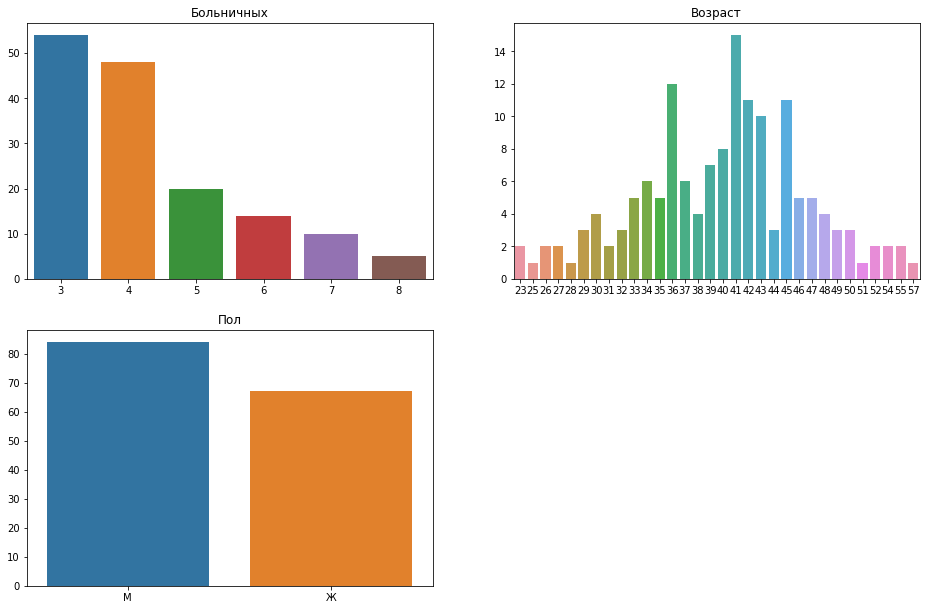

In [0]:
data(task_3.loc[task_3.Больничных>2])

Выводим данные более 2 рабочих дней.

In [0]:
men_age = task_3.query("Пол == 'М' & Больничных > 2")
women_age = task_3.query("Пол == 'Ж' & Больничных > 2")

Смотрим гендерное распределение.

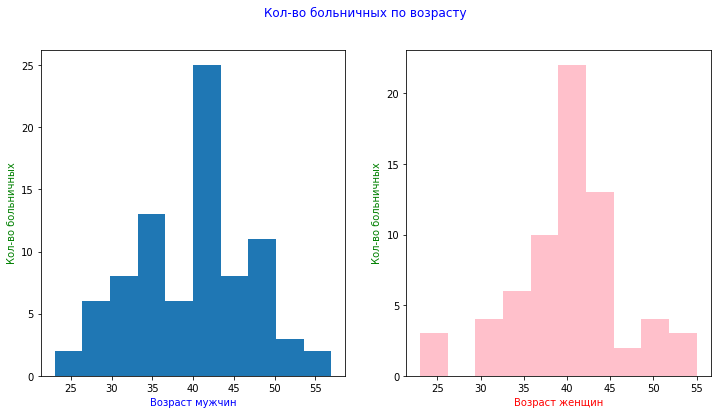

In [0]:
graphic_gender(men_age,women_age)

Совмещаем в одном графике гендерное распределение.

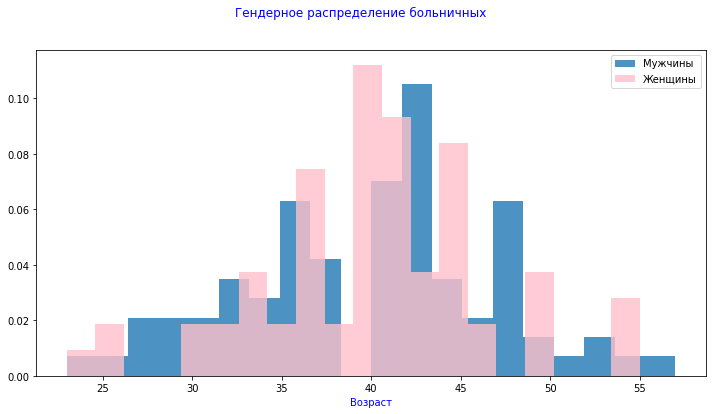

In [0]:
graphic_man_and_woman(men_age,women_age)

In [0]:
mean_gender = task_3.Пол.value_counts()
man = task_3.query("Пол == 'М' & Больничных > 2").mean()
woman = task_3.query("Пол == 'Ж' & Больничных > 2").mean()

Строим таблицу для вывода гендерного распределения. 

In [0]:
gender_count(man,woman,mean_gender)

Мужчин больше на 29%


,Пол,Кол-во,Данная_выборка в %,Данная_выборка_mean,Равнозначная_выборка в %,Равнозначная_выборка_mean
0,Мужчины,139,100.0,4.333333,100,5.611511
1,Женщины,98,71.0,4.238806,100,4.238806


С учетом, что, в выборке, женщин на 29% меньше чем мужчин, можно сделать **<font color='blue'>вывод:</font>** что мужчины пропускают в течение года более 2 рабочих дней по болезни значимо чаще женщин.  
В равнозначной_выборке: Мужчины = 5.611511 > Женщины = 4.238806 	

#### Необходимо обосновать, что: 2) Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег. Необходимо подготовить выводы в результате анализа.

Общее распределение по возрасту c пропусками, в течение года, более 2 рабочих дней.

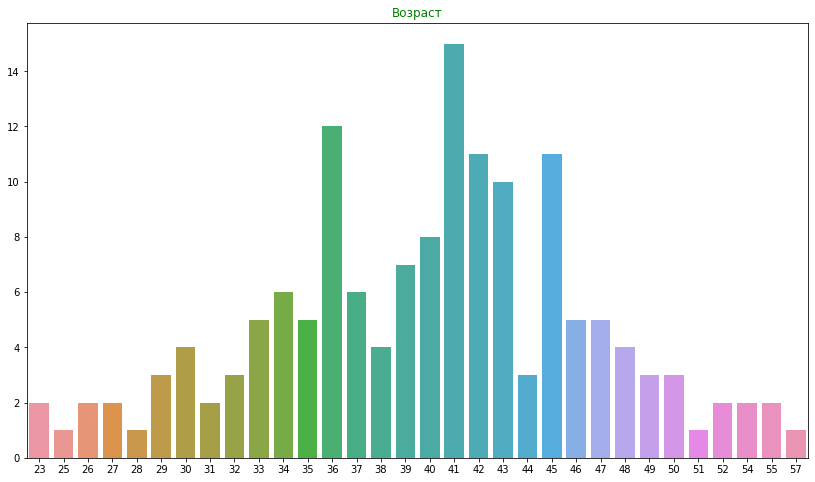

In [0]:
age(task_3.loc[task_3.Больничных>2])

Графики до 35 лет и после 35 лет.

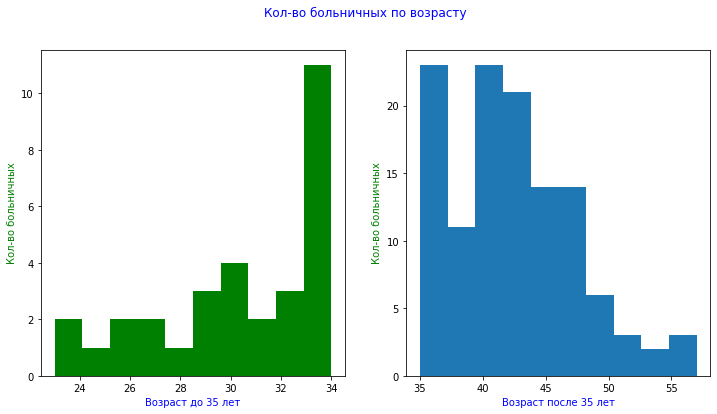

In [0]:
graphic_age(task_3.query("Возраст < 35 & Больничных > 2"),task_3.query("Возраст >= 35 & Больничных > 2"))

In [0]:
age_to_35 = task_3.query("Возраст < 35 & Больничных > 2")
age_after_35 = task_3.query("Возраст >= 35 & Больничных > 2")
conclusion = pd.DataFrame({"Возраст":['До 35 лет', 'После 35 лет'],
                    "Кол-во больничных":[age_to_35.Больничных.sum(), age_after_35.Больничных.sum()]})

In [0]:
conclusion

,Возраст,Кол-во больничных
0,До 35 лет,136
1,После 35 лет,512


#### <font color='blue'>Вывод:</font>  
Работники старше 35 лет пропускают, в течение года, более 2 рабочих дней по болезни в 4 раза чаще своих более молодых коллег.

# Задача 4  
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Ссылки-на-задачи" data-toc-modified-id="Ссылки-на-задачи-0.0.1">Ссылки на задачи</a></span></li></ul></div>  

#### Определите какие параметры (X1 – X21) сильнее влияют на Y, определите коэффициент корреляции и постройте уравнение регрессии.

In [0]:
task_4 = pd.read_excel(open('Задачи.xlsx', 'rb'),sheet_name='задание 4')

In [0]:
task_4.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,y
0,0.0045,0.0,0.0,0.0016,675.5,680.8,0.034,0.004,0.083,0.012,...,0.017,0.020,0.37,0.0024,0.0032,187,0,0,187,0.030
1,0.0030,0.0,0.0,0.0000,523.2,600.8,0.028,0.004,0.108,0.015,...,0.013,0.016,0.36,0.0021,0.0006,116,0,0,116,0.000
2,0.0040,0.0,0.0,0.0018,635.6,697.5,0.042,0.004,0.150,0.027,...,0.015,0.018,0.44,0.0023,0.0024,0,24,0,24,-0.005


**Оценка корреляций с целевой переменной**

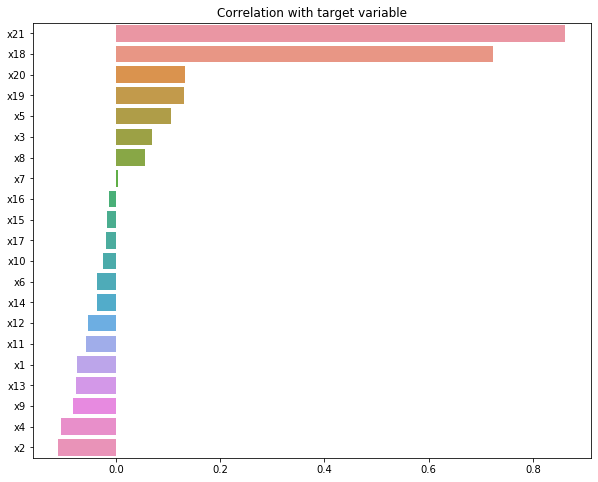

In [0]:
corr_target(task_4)

#### Определяем коэффициент корреляции таблицы

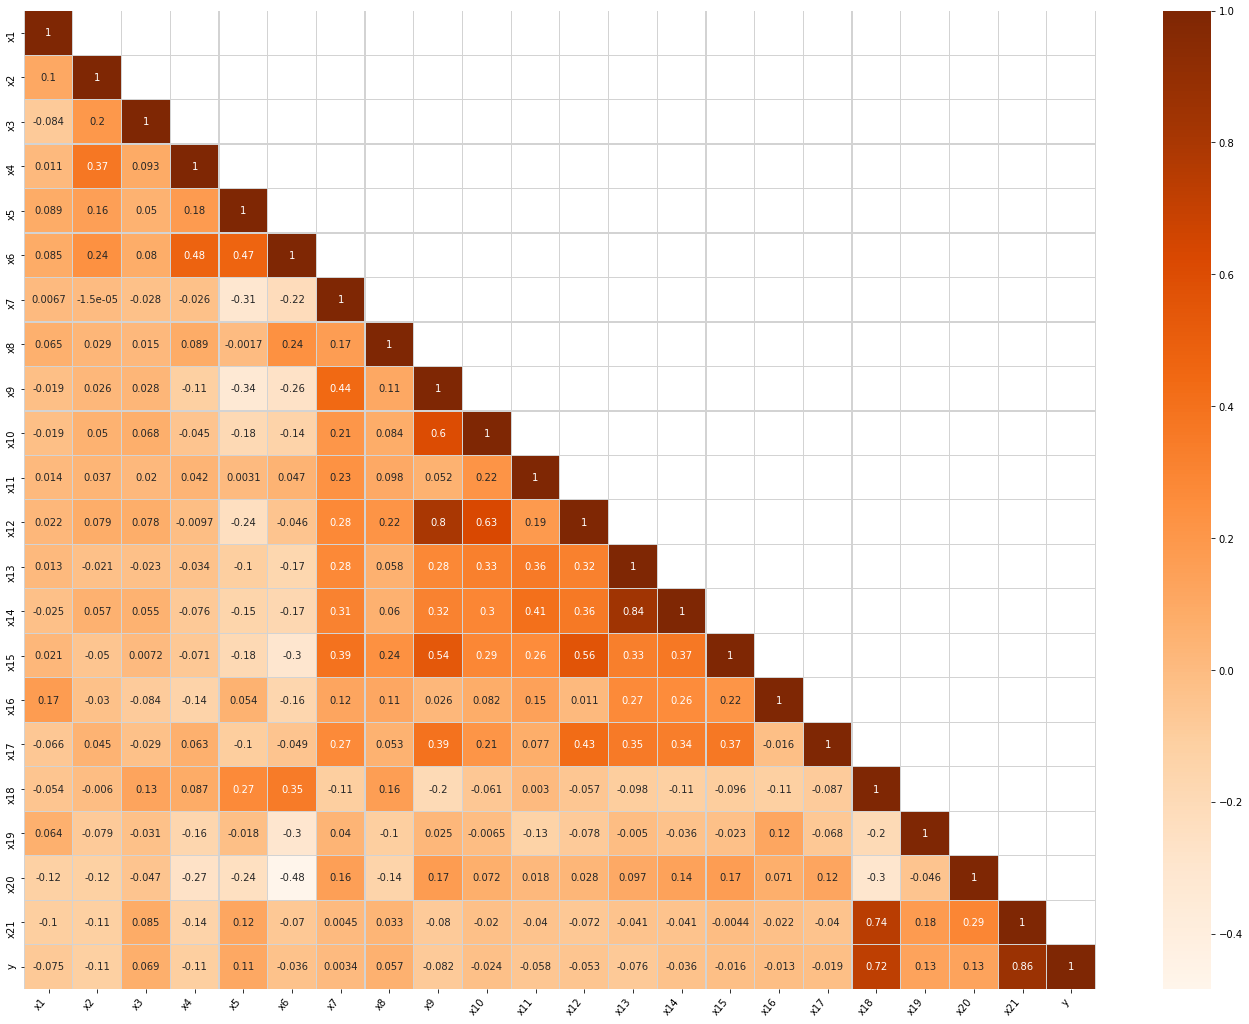

In [0]:
corr_matrix(task_4, cmap='Oranges')

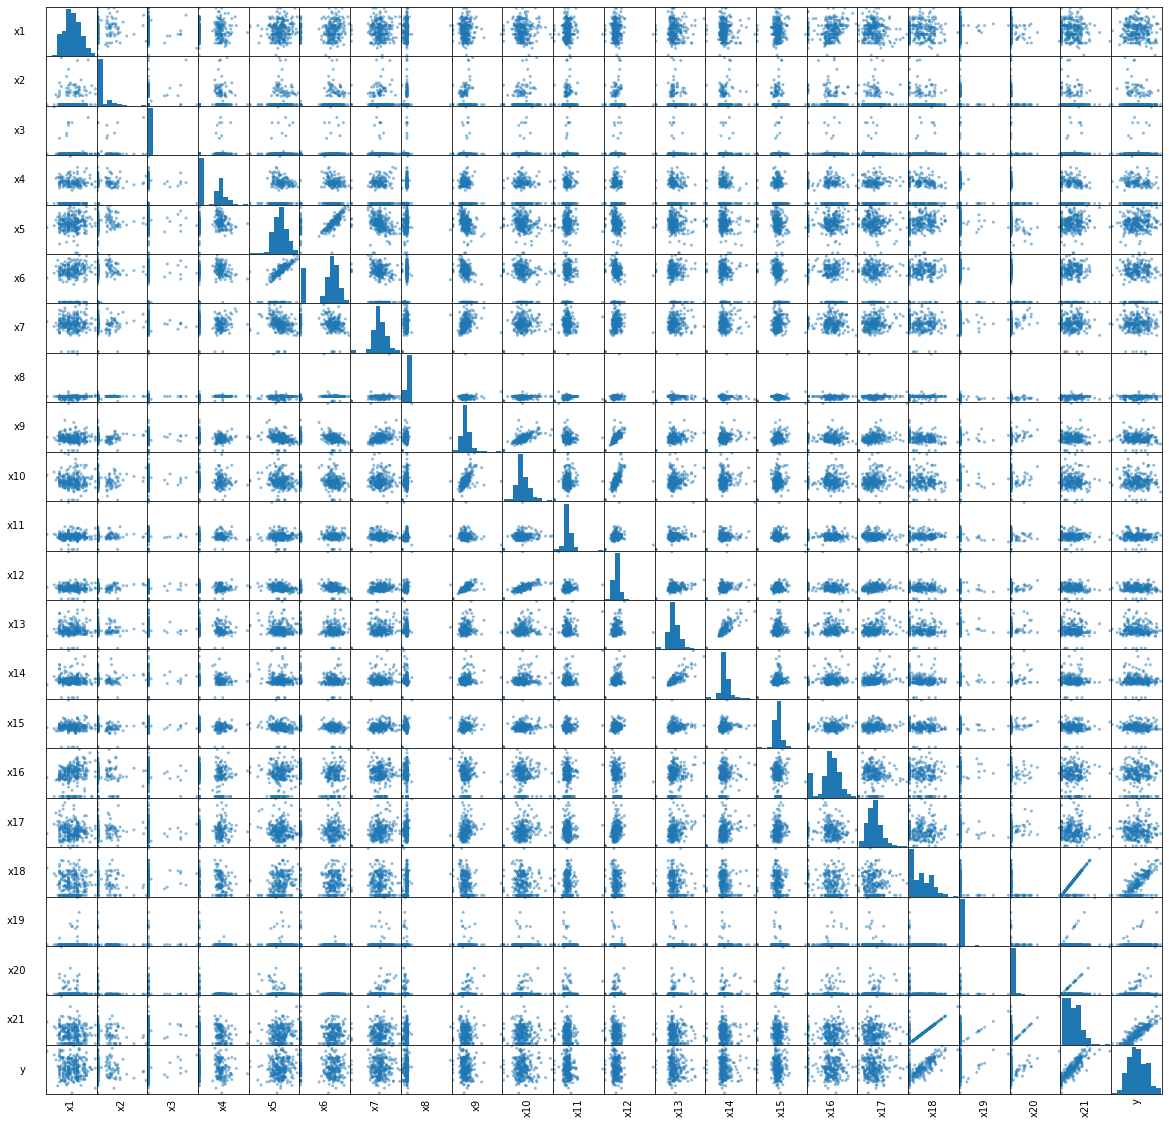

In [0]:
scatter_matrix(task_4)

Выводим общий процент корреляции.

In [0]:
corr_features = task_4.corr().sum().to_frame()
round(corr_features.sum()[0],2)

53.04

Отсортированные фичи(X1 – X21) и Y, в процентах корреляции.

In [0]:
corr_features.sort_values(0,ascending=False).head(3)

,0
x12,4.454557
x14,4.163420
x15,4.003753


Определяем результат фичей в паре (X1 – X21)которые сильнее влияют на Y, с помощью CatBoostRegressor.

In [0]:
main_features(task_4).shape

(54, 3)

In [0]:
main_features(task_4).head(4)

,first_feature,second_feature,impact on Y in %
0,x15,x21,7.18
1,x10,x19,6.19
2,x6,x9,5.59
3,x17,x21,4.36


#### <font color='blue'>Постройте уравнение регрессии</font>

### Формула: y =ax+b

Расмотрим простой случай применения регрессии.  
Нужно предсказать сколько наберет баллов ученик при сдачи ЕГЭ, опираясь на опыт(в годах) репетитора.

X0 - интерсепт  
X - сколько лет преподает учитель  
y    - сколько балов набрал ученик на ЕГЭ

In [0]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [0]:
y = [45, 55, 50, 59, 65,35, 75, 80, 50, 60]

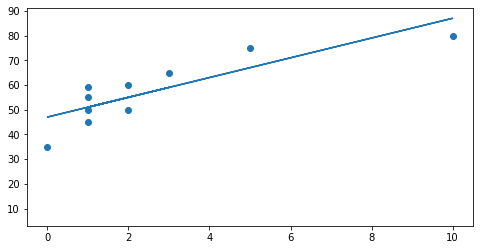

In [0]:
plt.figure(figsize = (8,4))
plt.scatter(X[1], y)
plt.plot(X[1], 47*X[0] + X[1]*4,7)
#plt.plot(X[1], 45*X[0] + X[1]*5);

# Обучение и валидация
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Ссылки-на-задачи" data-toc-modified-id="Ссылки-на-задачи-0.0.1">Ссылки на задачи</a></span></li></ul></div>

Выводим таргет.

In [0]:
y = task_4['y']
task_4 = task_4.drop('y',axis=1)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(task_4, y, test_size=0.3, random_state=42)

### LinearRegression

In [0]:
lr  = LinearRegression()

In [0]:
train_model(lr, X_train, y_train, X_valid, y_valid)

R2: 0.6614291446503697
MSE: 0.0001024778276743575
MAE: 0.007513025143061114
RMSE: 0.010123133293321663


Train R2:	0.821
Test R2:	0.661


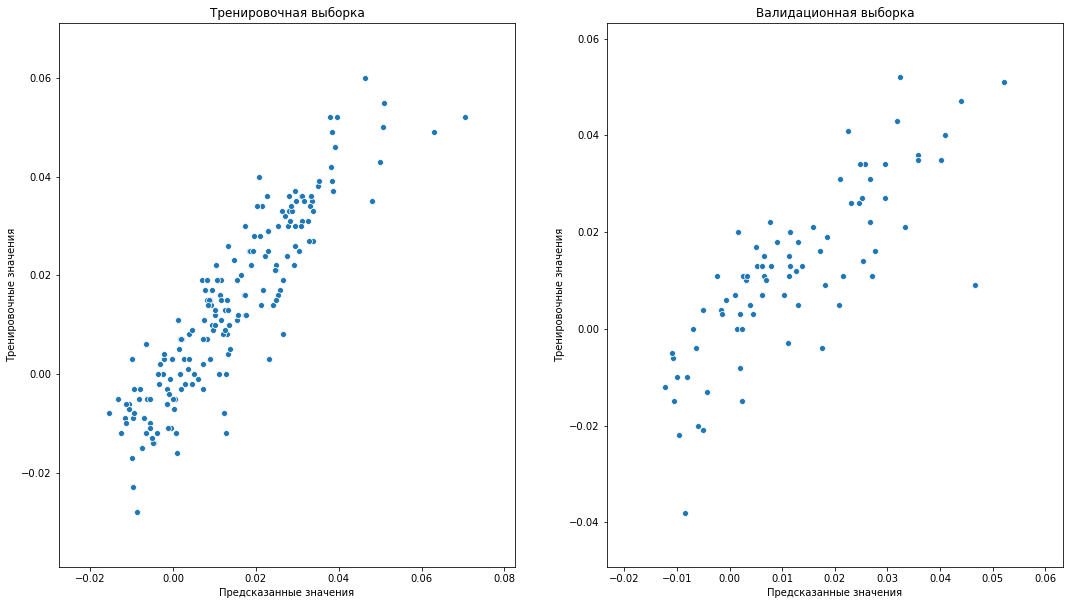

In [0]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_valid_pred = lr.predict(X_valid)

evaluate_preds(y_train, y_pred, y_valid, y_valid_pred)

In [0]:
feature_importances = pd.DataFrame(zip(X_train.columns, lr.coef_), 
                                   columns=['feature_name', 'importance'])

round(feature_importances.sort_values(by='importance', ascending=False),2)

,feature_name,importance
3,x4,1.19
13,x14,0.74
0,x1,0.67
16,x17,0.56
15,x16,0.45
11,x12,0.12
7,x8,0.06
6,x7,0.05
9,x10,0.02
20,x21,0.00


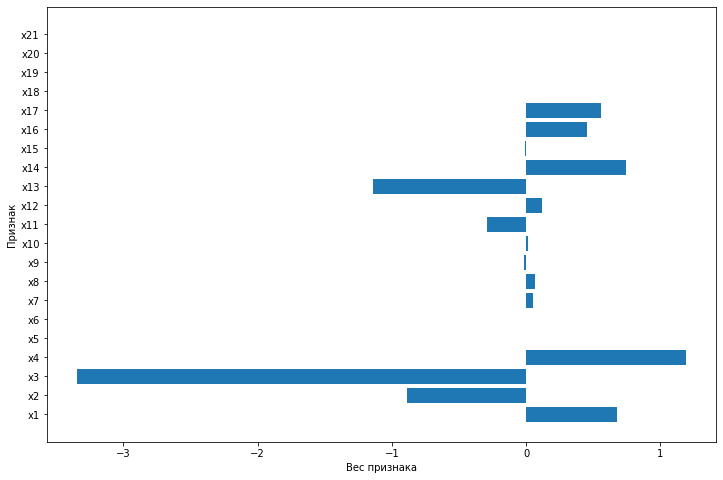

In [0]:
plt.figure(figsize = (12,8))
plt.barh(X_train.columns, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак");